# Computes volume-integrated mixing ratios for Fig. 9, that shows the temporal variability of mixing 

In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

2022-11-30 10:48:08,836 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-53q80ke_', purging
2022-11-30 10:48:08,836 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-kq_m8wch', purging
2022-11-30 10:48:08,837 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-kp_6dery', purging
2022-11-30 10:48:08,837 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-x6p_kyiz', purging
2022-11-30 10:48:08,838 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-32x3dn3p', purging
2022-11-30 10:48:08,838 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-_sg2pkjb', purging
2022-11-30 10:48:08,838 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-wz6u34nn', purging

In [2]:
#Times directly after the the restart process occurs, remove these 
timedrop = [np.datetime64('2010-06-18T18:30:00.000000000'), 
            np.datetime64('2010-06-19T18:30:00.000000000'), 
            np.datetime64('2010-07-09T18:30:00.000000000'),
            np.datetime64('2010-07-09T19:30:00.000000000')]
#Parent model
chi_online = xr.open_mfdataset('/d2/home/dylan/JAMES/budget_outputs/mixing/chi_online_ver1_2010_*.nc').chi_online.sel(ocean_time = slice('2010-06-03', '2010-07-13'))
chi_online = chi_online.where((chi_online.ocean_time!= timedrop[0])
                               & (chi_online.ocean_time!= timedrop[1])
                               & (chi_online.ocean_time!= timedrop[2])
                               & (chi_online.ocean_time!= timedrop[3]),
                                 drop=False)

chih = xr.open_dataset('/d2/home/dylan/JAMES/revised_submission/horz_terms/chi_horz/chih_parent_hgrad.nc').chih_parent.sel(ocean_time = slice('2010-06-03', '2010-07-13'))
chih = chih.where((chih.ocean_time!= timedrop[0])
                     & (chih.ocean_time!= timedrop[1])
                     & (chih.ocean_time!= timedrop[2])
                     & (chih.ocean_time!= timedrop[3]),
                     drop=False)

mnum_online = xr.open_mfdataset('/d2/home/dylan/JAMES/budget_outputs/mixing/mnum_online_ver1_2010_*.nc').mnum_online.sel(ocean_time = slice('2010-06-03', '2010-07-13'))
mnum_online = mnum_online.where((mnum_online.ocean_time!= timedrop[0])
                                             & (mnum_online.ocean_time!= timedrop[1])
                                             & (mnum_online.ocean_time!= timedrop[2])
                                             & (mnum_online.ocean_time!= timedrop[3]),
                                             drop=False)

#Child model
chi_online_child = xr.open_mfdataset('/d2/home/dylan/JAMES/budget_outputs/mixing/chi_online_nested_2010_*.nc').chi_online.sel(ocean_time = slice('2010-06-03', '2010-07-13'))
chi_online_child = chi_online_child.where((chi_online_child.ocean_time!= timedrop[0])
                                             & (chi_online_child.ocean_time!= timedrop[1])
                                             & (chi_online_child.ocean_time!= timedrop[2])
                                             & (chi_online.ocean_time!= timedrop[3]),
                                             drop=False)

chih_child = xr.open_mfdataset('/d2/home/dylan/JAMES/revised_submission/horz_terms/chi_horz/chi_horizontal_child_hgrad1_*.nc').chi_horizontal.sel(ocean_time = slice('2010-06-03', '2010-07-13'))
chih_child = chih_child.where((chih_child.ocean_time!= timedrop[0])
                     & (chih_child.ocean_time!= timedrop[1])
                     & (chih_child.ocean_time!= timedrop[2])
                     & (chih_child.ocean_time!= timedrop[3]),
                     drop=False)

mnum_online_child = xr.open_mfdataset('/d2/home/dylan/JAMES/budget_outputs/mixing/mnum_online_nested_2010_*.nc').mnum_online.sel(ocean_time = slice('2010-06-03', '2010-07-13'))
mnum_online_child = mnum_online_child.where((mnum_online_child.ocean_time!= timedrop[0])
                                             & (mnum_online_child.ocean_time!= timedrop[1])
                                             & (mnum_online_child.ocean_time!= timedrop[2])
                                             & (mnum_online.ocean_time!= timedrop[3]),
                                             drop=False)

#Second step - select only parent times where child output is available
chi_online = chi_online.where(chi_online_child.ocean_time==chi_online.ocean_time)
chih = chih.where(chih_child.ocean_time==chih.ocean_time)
mnum_online = mnum_online.where(mnum_online_child.ocean_time==mnum_online.ocean_time)

chi_tot = chih+chi_online
chi_tot_child = chih_child+chi_online_child

mtotal_parent = chi_tot+mnum_online
mtotal_child = chi_tot_child+mnum_online_child

In [3]:
# Basic statistics and percent change of the different ratios 
r1 = chi_tot_child/chi_tot
r2 = mnum_online_child/mnum_online
r3 = mtotal_child/mtotal_parent
r4 = mnum_online/chi_online

print(r1.mean().values)
print(r2.mean().values)
print(r3.mean().values)
print(r4.mean().values)

1.6531318318737374
0.6694107336166369
1.1224100232158554
1.7336339340883795


In [4]:
r5 = chi_tot_child.mean().values/chi_tot.mean().values
r6 = mnum_online_child.mean().values/mnum_online.mean().values
r7 = mtotal_child.mean().values/mtotal_parent.mean().values
r8 = mnum_online.mean().values/chi_tot.mean().values
print(r5)
print(r6)
print(r7)
print(r8)


1.422858682781343
0.6452934759358744
1.1412188913457528
0.5679075576371034


In [5]:
print((mnum_online/mtotal_parent).mean().values)
print((mnum_online_child/mtotal_child).mean().values)

0.5002910543064315
0.3190641377114069


In [12]:
print((mnum_online.sum().values/chi_tot.sum().values))
# print((mnum_online.mean().values/chi_tot.mean().values))
print((mnum_online.sum().values/chi_online.sum().values))
print((mnum_online_child.sum().values/chi_tot_child.sum().values))
print((mnum_online_child.sum().values/chi_online_child.sum().values))

0.5679075576371034
0.5813310604681055
0.2575568791986744
0.27354776769162015


In [15]:
def per_change(final, initial):
    perchange = 100*((final-initial)/np.abs(initial))
    return perchange

print(per_change(chi_online_child.mean().values, chi_online.mean().values))
print(per_change(chi_tot_child.mean().values, chi_tot.mean().values))
#Confirm sum yields the same answer as the mean does 
print(per_change(chi_online_child.sum().values, chi_online.sum().values))
print(per_change(chi_tot_child.sum().values, chi_tot.sum().values))

#Change in total mixing
print(per_change(mtotal_child.mean().values, mtotal_parent.mean().values))
# mtotal_child.mean().values/mtotal_parent.mean().values
# print(per_change(chi_tot_child.mean().values, chi_tot.mean().values))

37.13478411633313
42.285868278134295
37.13478411633312
42.28586827813431
14.121889134575284


In [29]:
print(per_change(chih_child.sum().values, chih.sum().values))

260.21256463607415


In [21]:
print((chih.sum().values/chi_tot.sum().values)*100)
print((chih_child.sum().values/chi_tot_child.sum().values)*100)

2.309097817720739
5.845738982952609


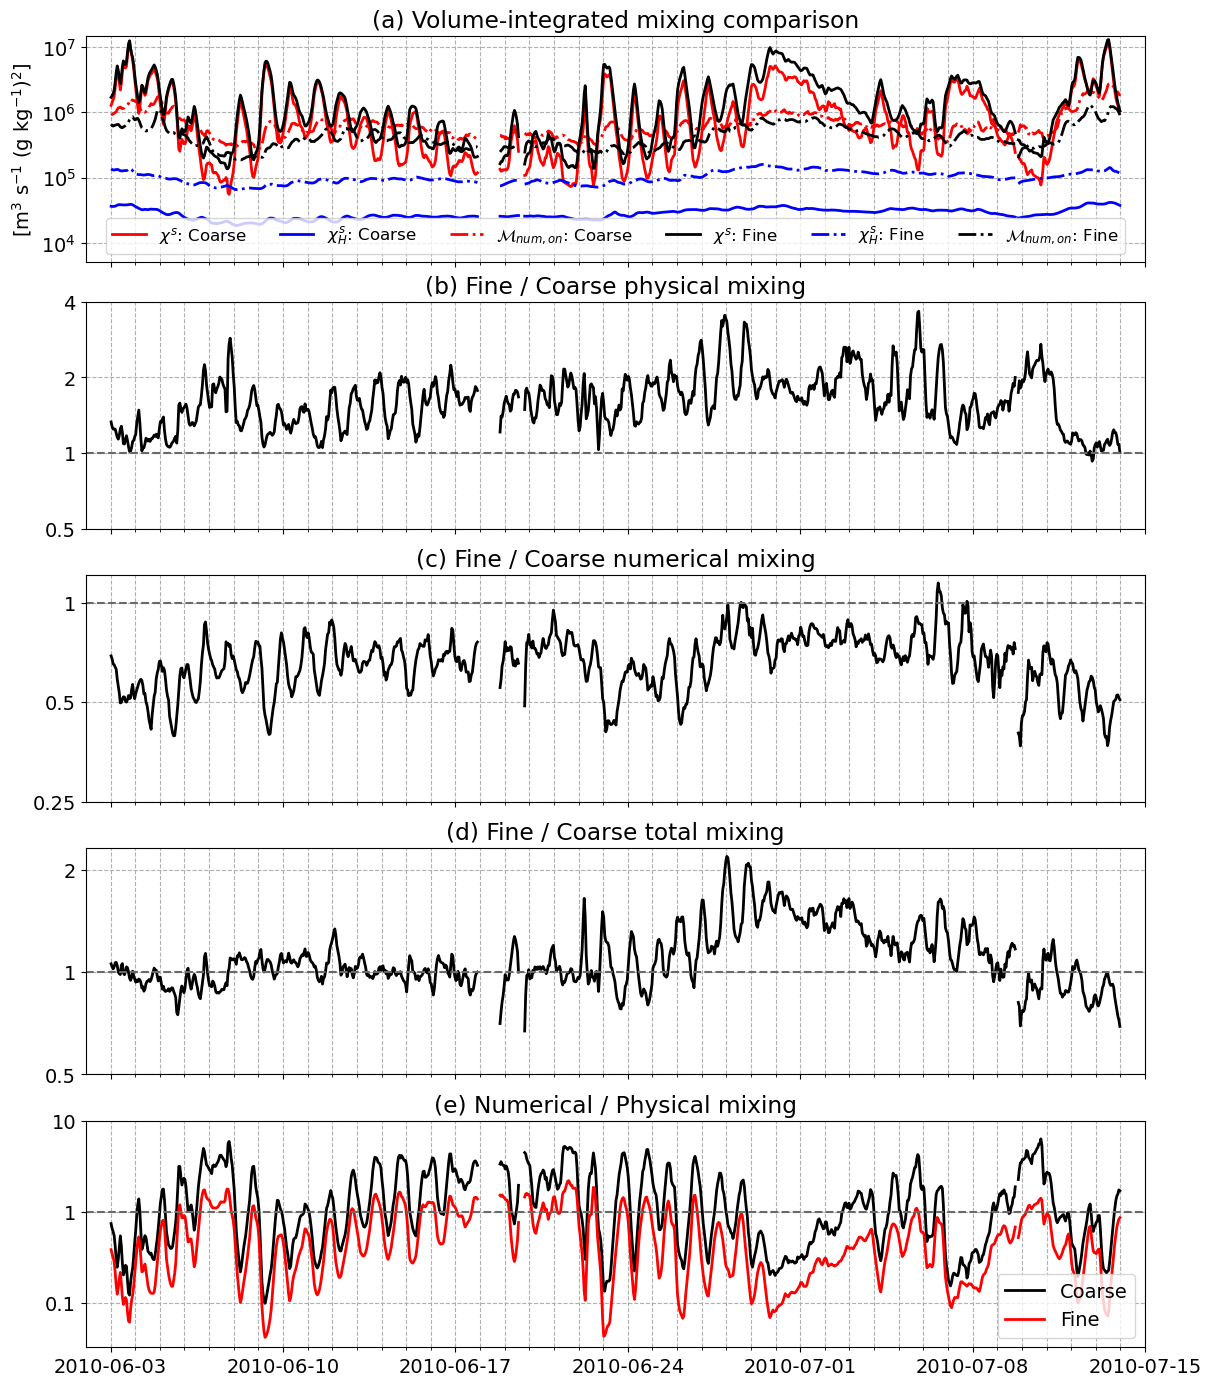

In [ ]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(5,1, figsize = (12,2.75*5), constrained_layout = True, sharey = False)

ax[0].plot(r1.ocean_time, chi_tot, lw = 2, color = 'r', label = r'$\chi^s$: Coarse')
ax[0].plot(r1.ocean_time, chih, lw = 2, color = 'b', label = r'$\chi_H^s$: Coarse')
ax[0].plot(r1.ocean_time, mnum_online, lw = 2, color = 'r', ls = '-.', label = r'$\mathcal{M}_{num, on}$: Coarse')
ax[0].plot(r1.ocean_time, chi_tot_child, lw = 2, color = 'k', label = r'$\chi^s$: Fine')
ax[0].plot(r1.ocean_time, chih_child, lw = 2, color = 'b', ls = '-.', label = r'$\chi_H^s$: Fine')
ax[0].plot(r1.ocean_time, mnum_online_child, lw = 2, color = 'k', ls = '-.', label = r'$\mathcal{M}_{num, on}$: Fine')
ax[0].set_yscale("log")
ax[0].set_yticks([10**4, 10**5, 10**6, 10**7])
ax[0].legend(ncol = 6, loc = 'lower center', fontsize = 12)
ax[0].minorticks_off()
ax[0].set_ylim(5000, 1.5e7)

ax[0].set_title('(a) Volume-integrated mixing comparison')

ax[1].plot(r1.ocean_time, np.log10(r1), lw = 2, c = 'k')
ax[1].set_title('(b) Fine / Coarse physical mixing')
ax[1].set_ylabel('')
ax[1].minorticks_off()
ax[1].set_yticks([-0.30103, 0, 0.30103, 0.60206])
ax[1].set_yticklabels([1/2, 1, 2, 4])

ax[2].plot(r1.ocean_time, np.log10(r2), lw = 2, c = 'k')
ax[2].set_title('(c) Fine / Coarse numerical mixing')
ax[2].set_ylabel('')
ax[2].minorticks_off()
ax[2].set_yticks([-0.60206, -0.30103, 0, ])
ax[2].set_yticklabels([1/4, 1/2, 1])

ax[3].plot(r1.ocean_time, np.log10(r3), lw = 2, c = 'k')
ax[3].set_title('(d) Fine / Coarse total mixing')
ax[3].minorticks_off()
ax[3].set_yticks([-0.30103, 0, 0.30103])
ax[3].set_yticklabels([1/2, 1, 2])

ax[4].plot(r1.ocean_time, np.log10(mnum_online/chi_tot), lw = 2, c = 'k', label = 'Coarse')
ax[4].plot(r1.ocean_time, np.log10(mnum_online_child/chi_tot_child), lw = 2, c = 'r', label = 'Fine')
ax[4].set_title('(e) Numerical / Physical mixing')
ax[4].set_ylabel('')
ax[4].set_yticks([-1, 0, 1])
ax[4].set_yticklabels([0.1, 1, 10])
ax[4].legend()

myFmt = mdates.DateFormatter("%Y-%m-%d")
dates = ['2010-06-03', '2010-06-10', '2010-06-17', '2010-06-24',
         '2010-07-01', '2010-07-08', '2010-07-15']
#Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
for i in range(5):
    ax[i].xaxis.set_major_formatter(myFmt)
    ax[i].set_xticks(ticks = dates)
    ax[i].xaxis.set_minor_locator(mdates.DayLocator())
    ax[i].set_xlim(datetime(2010,6,2), datetime(2010,7,15))
    minor_locator = AutoMinorLocator(7)
    ax[i].yaxis.grid(True, linestyle = '--')
    ax[i].xaxis.set_minor_locator(minor_locator)
    ax[i].xaxis.grid(True, which = 'both', linestyle = '--')
    
for i in range(4):
    ax[i].set_xticklabels([])
    ax[i].set_xlabel('')
    ax[i].grid(linestyle = '--')
    ax[i].set_ylabel('')
ax[i+1].grid(linestyle = '--')
ax[i+1].set_xlabel('')
# ax[i+1].set_xlabel('Time [month-day 2010]')

for i in range(3):
    ax[i+1].axhline(y = 0, ls = '--', c = 'dimgrey')
ax[4].axhline(y = 0, ls = '--', c = 'dimgrey')
plt.setp(ax[3].xaxis.get_majorticklabels(), rotation=0)

ax[0].set_ylabel(r'[m$^3$ s$^{-1}$ (g kg$^{-1}$)$^2$]')
plt.savefig('figures/mixing_comparison_time_series_revised.jpg', dpi = 300, bbox_inches='tight')